## - Airlines Delay Analysis -

SANGWON KIM

## 1. Introduction

### Question:<br>
Under what conditions can we assume that a flight is going to be delayed?<br>

### Motivation:<br>
Did you ever have to stay up all night to catch a flight at 4 am then learn that the flight is delayed and now you have to try and prevent falling asleep. I had this experience and wanted to reduce the chances of this happening.<br>


In the end of this project we will give you a guideline on how to avoid flights that are at higher risk of getting delayed.


### Dataset:
Link: https://urldefense.com/v3/__https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay__;!!DZ3fjg!5rnkPOqyUuIMPPCUR6ga0TLGq5qsByDoa8uwrQpfzpuTJAgkhRzctqJYlDTJbT5gRNl3Eq-OLqlGF9AdsnS2s9pJCQ$  <br>
Title: Airlines Dataset to predict a delay

#### Columns
Airline<br>
Airline of the flight<br>
Flight<br>
Number of Aircrafts<br>
AirportFrom<br>
Departure Airport<br>
AirportTo<br>
Ariving Airport<br>
DayOfWeek<br>
The day of the week<br>
Time<br>
Time after midnight in minutes<br>
Length<br>
Duration of the Flight<br>
Delay<br>
Delay status 0 is not delayed 1 is delayed<br>

In [2]:
#Imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [3]:
df = pd.read_csv('Airlines.csv')
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [13]:
sample = df.sample(500,replace=False).reset_index(drop=True)
sample

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,535819,MQ,4523,BOS,LGA,5,990,80,1
1,148041,UA,94,PHX,SFO,4,859,128,0
2,333368,CO,1,IAH,HNL,1,565,505,1
3,134079,AA,795,MIA,STT,3,1065,150,1
4,33471,B6,1084,CLT,JFK,4,1160,112,0
...,...,...,...,...,...,...,...,...,...
495,207903,AA,643,MIA,ORD,1,455,200,0
496,342642,MQ,3936,BWI,ORD,1,1045,150,1
497,291226,OO,4834,LAX,LAS,5,1079,70,1
498,397174,XE,2901,ORF,IAH,4,1013,211,0


In [14]:
df.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [15]:
df.dtypes

id              int64
Airline        object
Flight          int64
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Time            int64
Length          int64
Delay           int64
dtype: object

In [16]:
df.drop(columns=['id'], inplace = True)
df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3,15,205,1
1,US,1558,PHX,CLT,3,15,222,1
2,AA,2400,LAX,DFW,3,20,165,1
3,AA,2466,SFO,DFW,3,20,195,1
4,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...
539378,CO,178,OGG,SNA,5,1439,326,0
539379,FL,398,SEA,ATL,5,1439,305,0
539380,FL,609,SFO,MKE,5,1439,255,0
539381,UA,78,HNL,SFO,5,1439,313,1


## 2. Descriptive Analytics

### Research Question
Is there a relationship between Flight and Length where the flight is delayed?
How does the relationship between Flight and Length change when using a different Delay status?


#### How we chose the 3 variables.<br>
    We first used the pairplot and corr function in order to find the linear accociation between each of the variables.
    We were able to find that the Flight and the Length variable had the strongest linear relationship.
    Then we decided to separate the two variables based on the delay status considering that our primary research question  or the goal of this project is to create a accurate delay status predicting model.

In [17]:
sample_delayed = df[df['Delay'] == 1].sample(500,replace=False).reset_index(drop=True)
sample_delayed

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,EV,4948,MLB,ATL,1,890,101,1
1,EV,7106,ORD,SAV,4,1113,124,1
2,OO,4869,SLC,RNO,4,535,99,1
3,DL,205,MSP,DTW,7,930,104,1
4,MQ,2783,DFW,FSM,3,845,60,1
...,...,...,...,...,...,...,...,...
495,WN,2552,BNA,TPA,4,930,105,1
496,WN,1110,ABQ,HOU,5,1060,115,1
497,WN,2377,STL,BOS,5,590,155,1
498,FL,820,BOS,BWI,4,614,80,1


In [18]:
corr = sample_delayed[['Flight', 'Length']].corr()
corr

,Flight,Length
Flight,1.000000,-0.284195
Length,-0.284195,1.000000


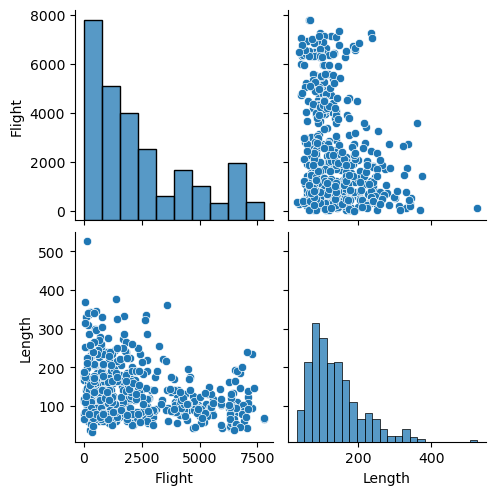

In [19]:
sns.pairplot(sample_delayed[['Flight', 'Length']])
plt.show()

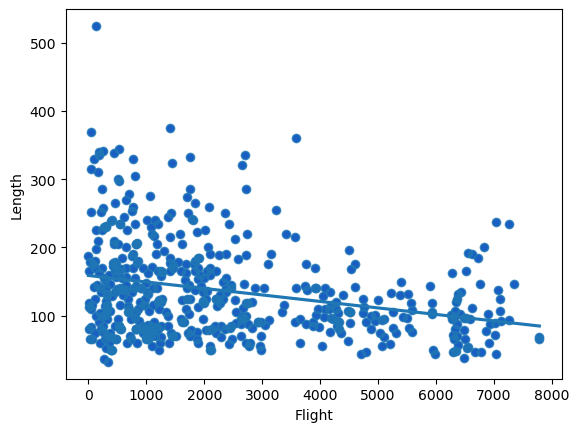

In [20]:
sample_delayed.plot.scatter(x='Flight', y = 'Length', c ='b')
sns.regplot(x='Flight', y = 'Length', data=sample_delayed, ci = False)
plt.show()

In [21]:
sample_not_delayed = df[df['Delay'] == 0].sample(500,replace=False).reset_index(drop=True)
sample_not_delayed

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,US,125,HNL,PHX,1,1430,362,0
1,MQ,2832,PNS,DFW,3,970,125,0
2,DL,1660,SEA,CVG,1,1410,255,0
3,AA,1201,ORD,STL,4,910,65,0
4,DL,1696,ATL,BDL,4,577,150,0
...,...,...,...,...,...,...,...,...
495,US,1431,CLT,LAX,5,465,322,0
496,DL,1430,MKE,DTW,3,840,82,0
497,AA,902,MIA,DFW,6,810,195,0
498,B6,691,BOS,DCA,5,1230,99,0


In [22]:
sample_not_delayed[['Flight', 'Length']].corr()

,Flight,Length
Flight,1.00000,-0.40529
Length,-0.40529,1.00000


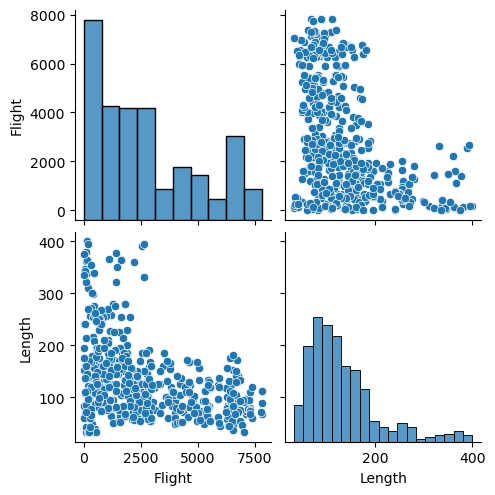

In [23]:
sns.pairplot(sample_not_delayed[['Flight', 'Length']])
plt.show()

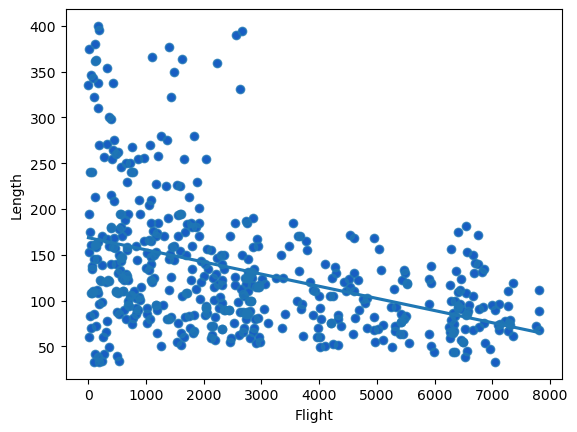

In [24]:
sample_not_delayed.plot.scatter(x='Flight', y = 'Length', c ='b')
sns.regplot(x='Flight', y = 'Length', data=sample_not_delayed, ci = False)
plt.show()

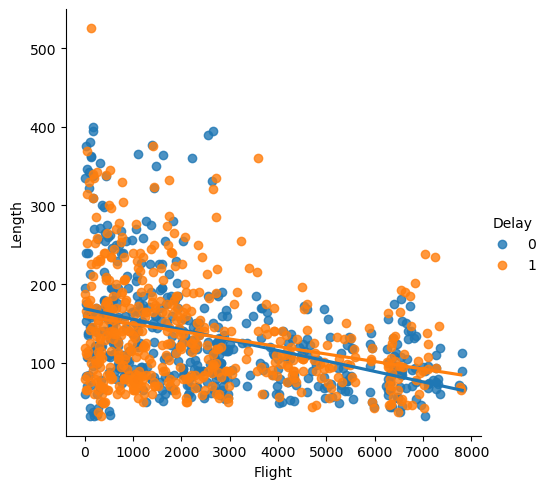

In [25]:
full_sample = pd.concat([sample_not_delayed, sample_delayed])
sns.lmplot(x='Flight', y = 'Length',hue = 'Delay', data=full_sample, ci = False)
plt.show()

In [26]:
slope_intercept = np.polyfit(sample_not_delayed['Flight'],sample_not_delayed['Length'],1)
slope_intercept

array([-1.32702760e-02,  1.68715788e+02])

In [27]:
slope_intercept = np.polyfit(sample_delayed['Flight'],sample_delayed['Length'],1)
slope_intercept

array([-9.52794001e-03,  1.58843186e+02])

### Conclusion

#### Relationship between two variables:
##### Delayed:
1. Strength/Correlation-0.315863
2. the graph is left skewed
3. The amount of plots are focused more towards the left side of the graph where there is less number of aircrafts but the duration of the flights decreases as the number of aircrafts increases.
4. Mainly focused in the range where flight is less than 3000.
5. Slope = -1.1560e-02, Intercept = 1.6542e+02

##### Not Delayed:
1. strength/correlation of -0.348377
2. the graph is left skewed
3. The amount of plots are focused more towards the left side of the graph where there is less number of aircrafts but the duration of the flights decreases as the number of aircrafts increases.
4. Mainly focused in the range where flight is less than 3000.
5. slope is -1.158e-02 while the intercept is 1.6032e+02.

The two variables Flight and Length had a linear relationship where the flight duration(Length) decreased when the number of aircrafts(Flight) increased.<br>
When comparing the two variables in with different delay status we were able to see there were almost none to minimal difference between the graphs. Therefor there is a relation between the duration of the flight and the number of aircrafts but is not codependent on the delay status or is not affected nor affects the delay status.

## 3. Inference

### Research Question
Is there sufficient evidence to suggest that there is an association bewteen the Flight that are delayed and Flight that are not delayed?
Is there sufficient evidence to suggest that the average of the Flight that are delayed is different from the Flight that are not delayed?

##### Null Hypothesis:
##### μ_delayed −μ_not_delayed =0

##### Alternative Hypothesis:
##### μ_delayed −μ_not_delayed !=0
<br>
<br>



We wanted to see if we were able to disregard the Flight variable when creating a predictive model for the delay status.<br>
Therefor we checked if there was a change in the Flight varibale based on the Delay status.<br>


#### Checking Conditions
1. Sample of flights is randomly selected from the population of all flights. - met
2. n_sample_delay = 500 which is less than 10% of the population of flights that are delayed(240264) - met
3. n_sample_delay = 500 is greater than 30 - met
4. n_sample_not_delay = 500 which is less than 10% of the population of flights that are not delayed(299119) - met
5. n_sample_not_delay = 500 is greather than 30 - met
6. Each samples are independant to one another - met

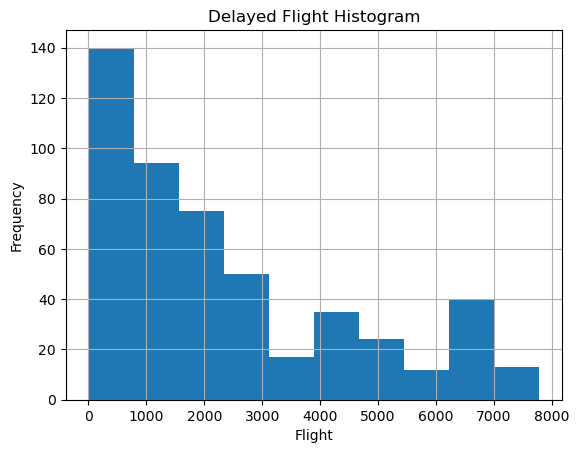

In [28]:
sample_delayed['Flight'].hist() 
plt.title('Delayed Flight Histogram') 
plt.xlabel('Flight') 
plt.ylabel('Frequency')
plt.show()

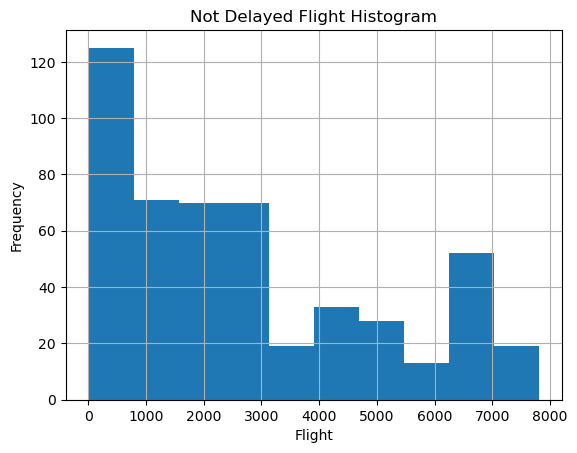

In [29]:
sample_not_delayed['Flight'].hist() 
plt.title('Not Delayed Flight Histogram') 
plt.xlabel('Flight') 
plt.ylabel('Frequency') 
plt.show()

In [30]:
delayed_flight_mean = sample_delayed['Flight'].mean()
not_delayed_flight_mean = sample_not_delayed['Flight'].mean()
p_est = delayed_flight_mean - not_delayed_flight_mean
crit_val = t.ppf(0.995, df=500-1)
delayed_flight_std = sample_delayed['Flight'].std()
not_delayed_flight_std = sample_not_delayed['Flight'].std()
ste = np.sqrt((delayed_flight_std**2)/235 + (not_delayed_flight_std**2)/265)

In [31]:
lower = p_est - crit_val * ste
upper = p_est + crit_val * ste
lower, upper

(-852.282099063561, 147.3660990635617)

In [32]:
null = 0
test_stat = (p_est - null)/ste
test_stat

-1.82335522609167

In [33]:
p_val = 2*(1-t.cdf(np.abs(test_stat), df = 500))
p_val

0.06884651303611666

### Interpretation

The 99% confidence interval has the range between -699.70844 to 222.82444. 

We have no sufficient evidence to claim that the Flight varible changes based on the Delay status.

We fail to reject the null hypothesis μ_delayed − μ_not_delayed = 0 and there is no difference between the Flight varible for flights that has been delayed and that has not been delayed.

With significance level of α = 0.01. p-value=0.18195 > α=0.01 therefor we fail to reject the null hypothesis.


### Conclusion
There is no sufficient envidence to suggest that there is an association between the Flight and Delay status.

We are able to remove the Flight variable when creating the model. 

## 4. Linear Regression

### Research Question

Is there a linear relationship between Delay and Time, Length, DayOfWEek, and Airline in the sample?

Is there sufficient evidence to suggest that there is a linear relationship bewteen Delay and Time, Length, DayOfWeek, and Airline in the Arilines dataset?

We have decided to exclude Flight from our previous step of conducting inference. Then we are left with 3 numerical variables Time, Length, and DayOfWeek. We then decided to included Airline because it is less codependent with another variable compared to AirportFrom and AirportTo

In [34]:
sample['ln_Time'] = np.log(sample['Time'])
sample['ln_Length'] = np.log(sample['Length'])
model = smf.ols('Delay ~ Time + Length + DayOfWeek + Airline', data = sample).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Delay   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     2.230
Date:                Tue, 06 Dec 2022   Prob (F-statistic):            0.00179
Time:                        00:51:15   Log-Likelihood:                -337.49
No. Observations:                 500   AIC:                             717.0
Df Residuals:                     479   BIC:                             805.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3466      0.146      2.368      0.018       0.059       0.634
Airline[T.AA]    -0.1156      0.139     -0.833      0.405      -0.389       0.157
Airline[T.AS]    -0.3935      0.181     -2.176      0.030      -0.749      -0.038
Airline[T.B6]    -0.2176      0.163     -1.335      0.182      -0.538       0.103
Airline[T.CO]    -0.0338      0.160     -0.211      0.833      -0.348       0.280
Airline[T.DL]    -0.1010      0.127     -0.796      0.426      -0.350       0.148
Airline[T.EV]    -0.1733      0.147     -1.176      0.240      -0.463       0.116
Airline[T.F9]     0.0413      0.244      0.169      0.866      -0.438       0.521
Airline[T.FL]    -0.1683      0.149     -1.127      0.260      -0.462       0.125
Airline[T.HA]    -0.3275      0.213     -1.535      0.126      -0.747       0.092
Airline[T.MQ]    -0.0201      0.138     -0.146      0.884      -0.291       0.251
Airline[T.OH]    -0.1828      0.149     -1.230      0.219      -0.475       0.109
Airline[T.OO]    -0.0124      0.126     -0.098      0.922      -0.261       0.236
Airline[T.UA]    -0.2790      0.143     -1.948      0.052      -0.560       0.002
Airline[T.US]    -0.1104      0.153     -0.724      0.470      -0.410       0.189
Airline[T.WN]     0.0943      0.122      0.775      0.439      -0.145       0.333
Airline[T.XE]    -0.0603      0.143     -0.421      0.674      -0.342       0.221
Airline[T.YV]    -0.3625      0.195     -1.855      0.064      -0.746       0.021
Time              0.0002   8.11e-05      2.653      0.008    5.58e-05       0.000
Length            0.0007      0.000      1.884      0.060   -3.04e-05       0.001
DayOfWeek        -0.0201      0.011     -1.759      0.079      -0.043       0.002
==============================================================================
Omnibus:                     2885.368   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.627
Skew:                           0.161   Prob(JB):                     1.13e-13
Kurtosis:                       1.339   Cond. No.                     1.86e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Linear Regression Equation:

Delay Status = 0.3605[Airline = CO] + 0.0022[Airline=US] -0.0730[Airline=AA] -0.1175[Airline=AS] + 0.0160[Airline=DL] + 	0.0638[Airline=B6] + 0.2010[Airline=HA] - 0.1175[Airline=OO] + 0.0211[Airline=OH] + 0.0558[Airline=EV] -0.0862[Airline=XE] + 0.0896[Airline=YV] + 0.0053[Airline=UA] -0.0454[Airline=MQ] - 0.1670[Airline=FL] + 0.1871[Airline=F9] + 0.3044[Airline=WN] + 0.0003 * Time + 0.0007*Length - 0.0002 DayOfWeek + 0.0334

1. Linearity Condition:<br>
When moving left to right of the graph there are even amount of negative and positive plots. So the linearity condition is met.

2. Constant Variable for Residual Condition:<br>
When moving left to right of the graph the residual spread is consistant therefor the constant variable for residual condition is met.


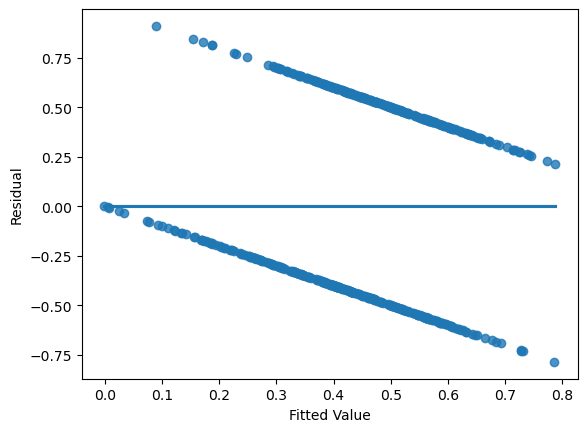

In [35]:
sns.regplot(x=model.fittedvalues, y=model.resid, ci=None) 
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

3. Normality of Residuals (with Mean of 0) Condition:<br>
The graph is bimodal which is not normal<br>
This condition is not met because the residual histogram is not normal.<br>


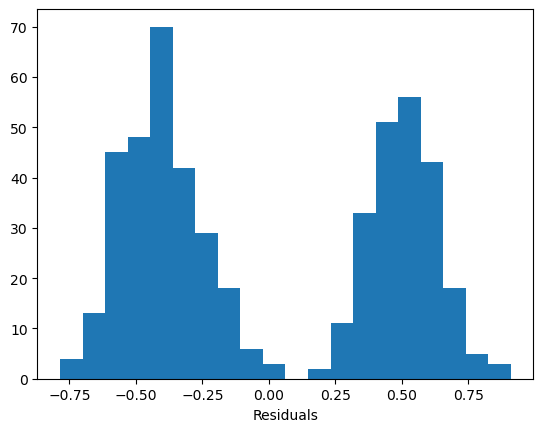

In [36]:
plt.hist(model.resid, bins=20)
plt.xlabel('Residuals') 
plt.show()

4. Independence of Residual Condition:<br>
    Sample is randomly selected from the flight dataset.<br>
    n = 500 < 10% of all flight dataset.<br>
This condition is met

5. No-Multicollinearity Condition:<br>
This condition is met because none of the numerical variable have a strong linear relationship with each other.


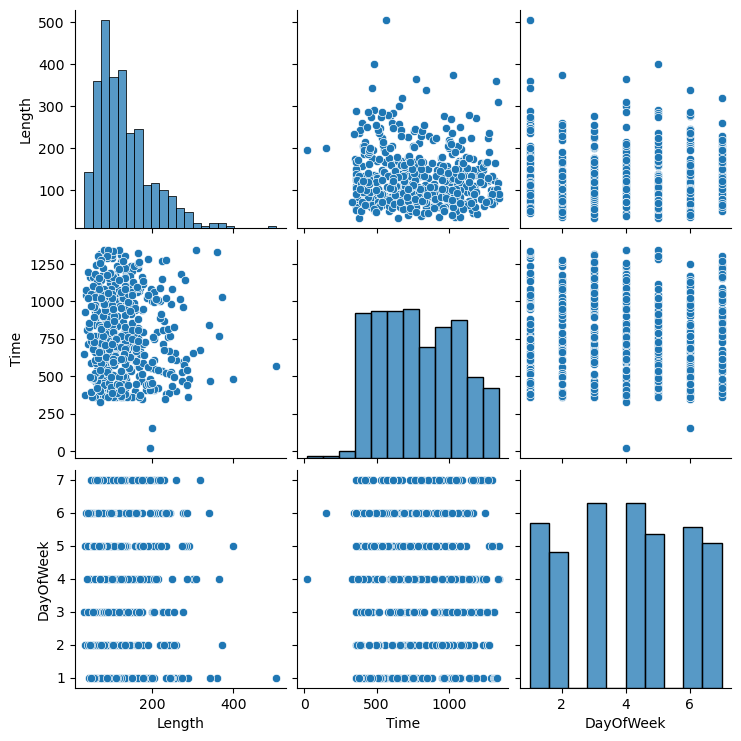

In [37]:
sns.pairplot(sample[['Length', 'Time', 'DayOfWeek']])
plt.show()

In [38]:
sample[['Length', 'Time', 'DayOfWeek']].corr()

,Length,Time,DayOfWeek
Length,1.000000,-0.091262,-0.075510
Time,-0.091262,1.000000,-0.080514
DayOfWeek,-0.075510,-0.080514,1.000000


### Assess Fit of The Model
#### R-Square
R^2 = 0.119 <br>
11.9% of the data is explained from the model.<br>
And 88.1% of the data is not.



#### Linearity Condition
The residual plots are consistant moving left to right of the graph. We can somewhat see the model has a pretty good fit.<br>


#### Model Equation
Delay Status = 0.3605[Airline = CO] + 0.0022[Airline=US] -0.0730[Airline=AA] -0.1175[Airline=AS] + 0.0160[Airline=DL] + 	0.0638[Airline=B6] + 0.2010[Airline=HA] - 0.1175[Airline=OO] + 0.0211[Airline=OH] + 0.0558[Airline=EV] -0.0862[Airline=XE] + 0.0896[Airline=YV] + 0.0053[Airline=UA] -0.0454[Airline=MQ] - 0.1670[Airline=FL] + 0.1871[Airline=F9] + 0.3044[Airline=WN] + 0.0003 * Time + 0.0007*Length - 0.0002 DayOfWeek + 0.0334

#### Slope Non Zero
When creating a linear regression model we do not see many variables that has a significant correlation to the delay status.<br>
With the significance level of 0.01 the only variable with a p-value lower than 0.01 is Time.<br>

We have sufficient evidence to say that the slope of Time in relation to Delay is non zero but we do not have sufficient evidence to say that any of the other variables' slope is non zero.

## Conclusion

#### Sample Linear Relationship
The R-Squared value was 0.119 which is too low for use to say there is a linear relation between the variables and the delay status. Therefor there is no linear relation between delay and Length, Time, DayOfWeek, and Airline.<br>


#### Population Linear Relationship
There were no multicollinear explanatory variables, and we have tried transforming the variables with a ln() to all the possible outcomes and we were still unable to meet all the conditions.<br>
Out of all the possible outcomes we were only able to find a non zero linear relationship between the Time and the Delay.<br>
Therefor we do not have sufficient evidence to suggest that there is a linear relationship between the variables and the Delay in the flight delay dataset.





## 5. Logistic Regression

### Research Question
What explanatory variables should we include in this model that predicts the delay status to build a parsimonious model?

Is there a linear relationship between the log-odds of the success level of delay and Length, Time, Airline, and DayOfWeek for the population of the Airline Delay Dataset?

#### Variable Selection
We chose to use Length, Time, Airline, and DayOfWeek as our variables and Delay as the response variable. <br>
Where 1 is delayed and 0 is not delayed we chose the threshold of 0.84.<br>
First we wanted to minimize the number of false positives considering that we did not want anyone missing their flights when it is not delayed.<br>
Then we also wanted the number of true positives to be higher than 10% of the total number of flights.<br>
When we use the threshold of 0.73 we are able to maintain the true positive rates to a number higher than 10% of the actual fights that were delayed and keep the false positive rate to lower than 20% of the total number of positive predictions.

In [4]:
train_df = df[:50000].reset_index(drop=True)
test_df = df[50000:].reset_index(drop=True)

In [5]:
model_l = smf.logit('Delay ~ Airline+DayOfWeek+Time+Length', data=train_df).fit() 
model_l.summary()

Optimization terminated successfully.
         Current function value: 0.589661
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Delay   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49979
Method:                           MLE   Df Model:                           20
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                 0.09324
Time:                        01:11:16   Log-Likelihood:                -29483.
converged:                       True   LL-Null:                       -32515.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3749      0.080     -4.696      0.000      -0.531      -0.218
Airline[T.AA]    -0.3001      0.061     -4.890      0.000      -0.420      -0.180
Airline[T.AS]    -0.5993      0.089     -6.736      0.000      -0.774      -0.425
Airline[T.B6]     0.2016      0.074      2.724      0.006       0.057       0.347
Airline[T.CO]     0.4424      0.070      6.316      0.000       0.305       0.580
Airline[T.DL]    -0.0427      0.058     -0.740      0.459      -0.156       0.070
Airline[T.EV]    -0.0359      0.065     -0.552      0.581      -0.163       0.091
Airline[T.F9]    -0.4130      0.107     -3.861      0.000      -0.623      -0.203
Airline[T.FL]    -0.8779      0.078    -11.191      0.000      -1.032      -0.724
Airline[T.HA]    -0.7604      0.127     -6.006      0.000      -1.009      -0.512
Airline[T.MQ]    -0.3541      0.063     -5.607      0.000      -0.478      -0.230
Airline[T.OH]    -0.5804      0.085     -6.818      0.000      -0.747      -0.414
Airline[T.OO]     0.0741      0.059      1.266      0.205      -0.041       0.189
Airline[T.UA]    -0.9148      0.072    -12.744      0.000      -1.055      -0.774
Airline[T.US]    -0.3485      0.064     -5.464      0.000      -0.474      -0.224
Airline[T.WN]     1.1173      0.054     20.606      0.000       1.011       1.224
Airline[T.XE]    -0.4660      0.067     -7.007      0.000      -0.596      -0.336
Airline[T.YV]    -1.1498      0.097    -11.844      0.000      -1.340      -0.959
DayOfWeek        -0.3750      0.013    -29.212      0.000      -0.400      -0.350
Time              0.0011    3.8e-05     29.028      0.000       0.001       0.001
Length            0.0027      0.000     16.654      0.000       0.002       0.003
=================================================================================
"""

In [7]:
print(model_l.bic, model_l.aic)
test_a = smf.logit('Delay ~ DayOfWeek+Time+Length', data=train_df).fit()
print(test_a.bic, test_a.aic)
test_b = smf.logit('Delay ~ Airline+Time+Length', data=train_df).fit()
print(test_b.bic, test_b.aic)
test_c = smf.logit('Delay ~ DayOfWeek+Airline+Length', data=train_df).fit()
print(test_c.bic, test_c.aic)
test_d = smf.logit('Delay ~ Airline+DayOfWeek+Length', data=train_df).fit()
print(test_d.bic, test_d.aic)

59193.29079965961 59008.075455686994
Optimization terminated successfully.
         Current function value: 0.630612
         Iterations 5
63104.454548423346 63069.1754352857
Optimization terminated successfully.
         Current function value: 0.598367
         Iterations 6
60053.11119190367 59876.71562621547
Optimization terminated successfully.
         Current function value: 0.598249
         Iterations 6
60041.32583791137 59864.930272223166
Optimization terminated successfully.
         Current function value: 0.598249
         Iterations 6
60041.32583791137 59864.930272223166


#### Since the original model using AIC had the lowest number of eleminations we proceed with the original model.

In [42]:
model_l = smf.logit('Delay ~ Airline+DayOfWeek+Time+Length', data=train_df).fit()
model_l.summary()

Optimization terminated successfully.
         Current function value: 0.589661
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Delay   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49979
Method:                           MLE   Df Model:                           20
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                 0.09324
Time:                        00:51:22   Log-Likelihood:                -29483.
converged:                       True   LL-Null:                       -32515.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3749      0.080     -4.696      0.000      -0.531      -0.218
Airline[T.AA]    -0.3001      0.061     -4.890      0.000      -0.420      -0.180
Airline[T.AS]    -0.5993      0.089     -6.736      0.000      -0.774      -0.425
Airline[T.B6]     0.2016      0.074      2.724      0.006       0.057       0.347
Airline[T.CO]     0.4424      0.070      6.316      0.000       0.305       0.580
Airline[T.DL]    -0.0427      0.058     -0.740      0.459      -0.156       0.070
Airline[T.EV]    -0.0359      0.065     -0.552      0.581      -0.163       0.091
Airline[T.F9]    -0.4130      0.107     -3.861      0.000      -0.623      -0.203
Airline[T.FL]    -0.8779      0.078    -11.191      0.000      -1.032      -0.724
Airline[T.HA]    -0.7604      0.127     -6.006      0.000      -1.009      -0.512
Airline[T.MQ]    -0.3541      0.063     -5.607      0.000      -0.478      -0.230
Airline[T.OH]    -0.5804      0.085     -6.818      0.000      -0.747      -0.414
Airline[T.OO]     0.0741      0.059      1.266      0.205      -0.041       0.189
Airline[T.UA]    -0.9148      0.072    -12.744      0.000      -1.055      -0.774
Airline[T.US]    -0.3485      0.064     -5.464      0.000      -0.474      -0.224
Airline[T.WN]     1.1173      0.054     20.606      0.000       1.011       1.224
Airline[T.XE]    -0.4660      0.067     -7.007      0.000      -0.596      -0.336
Airline[T.YV]    -1.1498      0.097    -11.844      0.000      -1.340      -0.959
DayOfWeek        -0.3750      0.013    -29.212      0.000      -0.400      -0.350
Time              0.0011    3.8e-05     29.028      0.000       0.001       0.001
Length            0.0027      0.000     16.654      0.000       0.002       0.003
=================================================================================
"""

### Logistic Regression Equation:

ln(p/1-p) = 0.4424[Airline = CO] -0.3485[Airline=US] -0.3001[Airline=AA] -0.5993[Airline=AS] - 0.0427[Airline=DL] + 	0.2016[Airline=B6] -0.7604[Airline=HA] + 0.0741[Airline=OO] - 0.5804[Airline=OH] - 0.0359[Airline=EV] -0.4660[Airline=XE]  -1.1498[Airline=YV] -0.9148[Airline=UA] -0.3541[Airline=MQ] -0.8779[Airline=FL] -0.4130[Airline=F9] + 1.1173[Airline=WN] + 0.0011 * Time + 0.0027*Length - 0.3750 DayOfWeek -0.3749

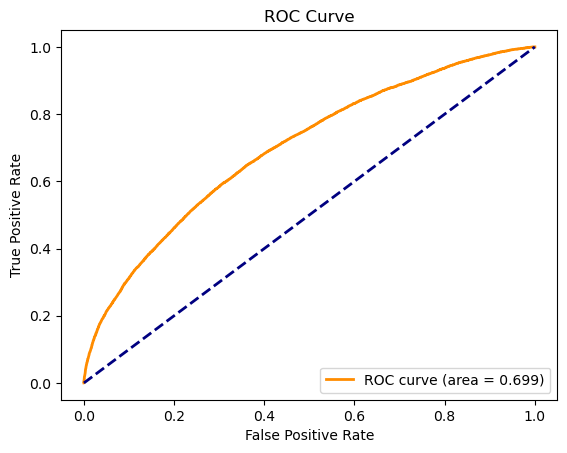

In [43]:
fpr, tpr, thresholds = roc_curve(y_true=train_df['Delay'], y_score=model_l.fittedvalues)
auc = roc_auc_score(y_true=train_df['Delay'], y_score=model_l.fittedvalues) 
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = '+str(round(auc,3))+')') 
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right")
plt.show()

### ROC and AUC interpretation
This shows that the model is able to accurately distinguish the corrent delay status 69.9% of the times.<br>
It also shows that it has the minimum amout of risk and highest return around 0.2 and 0.4 false positive rate which has somewhere in between 0.4 and 0.8 true positive rate.

In [44]:
test_df['pred_prob']=model_l.predict(exog=dict(test_df))  
test_df['pred_prob']
test_df['pred'] = 1*(test_df['pred_prob']>0.84)

In [45]:
test_df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,pred_prob,pred
0,OO,6436,PSP,LAX,5,1075,47,0,0.296281,0
1,OO,6537,ORD,MKG,5,1075,51,1,0.298526,0
2,OO,6864,ICT,ORD,5,1075,109,1,0.332128,0
3,OO,7021,LAS,LAX,5,1075,80,0,0.315085,0
4,UA,497,ORD,IAH,5,1075,164,0,0.176572,0
...,...,...,...,...,...,...,...,...,...,...
489378,CO,178,OGG,SNA,5,1439,326,0,0.657813,0
489379,FL,398,SEA,ATL,5,1439,305,0,0.326708,0
489380,FL,609,SFO,MKE,5,1439,255,0,0.297887,0
489381,UA,78,HNL,SFO,5,1439,313,1,0.323328,0


In [46]:
tn, fp, fn, tp = confusion_matrix(y_true=test_df['Delay'], y_pred=test_df['pred']).ravel()
tn, fp, fn, tp

(265522, 1331, 217190, 5340)

### Conclusion
Using a significance level of 0.01 we are able to see that all the slopes except when Airline[dl,ev,oo] has sufficient evidence to suggest that they are non zero.<br>
For Airline[dl,ev,oo] the p-value is higher than 0.01 therefore I do not have sufficient evidence to suggest that the slope is non zero. 

I checked each of the variables using backward elimination algorithm and forward selection algorithm.<br>
Based on the feature selection through BIC and AIC the full model had the lowest BIC and AIC score so I chose the full model with all features that was originally selected to be our final model.(features selected: Length, Time, Airline, DayOfWeek)<br>

Based on final model I was able to conclude that there is a linear relationship between the explanatory variables(Length, Time, Airline, and DayOfWeek) had a linear relationship with the response variable(Delay).



## 6. Conclusion

#### 1. Summarization:
When booking a flight YV(Mesa Airlines), UA(United Airlines), and HA(Hawaiian Airlines) you have the lowest chance of your flight being delayed while WN(Southwest Airlines) and CO(Continental Airlines) have a higher chance of the flights being delayed. Your flight is also more likely to get delayed when it is closer to midnight before the day passes and the longer the duration of the plane ride is. Also the Monday has the highest chance of the flight being delayed while Sunday has the lowest chance of the flight being delayed. The number of aircrafts(Flights) almost has no affect on the delay status.


In conclusion I recommend that your flight starts boarding 10 minutes after midnight, is closes to Sunday after monday, has the shortest flight duration to get to the destiny and is one of the three airlines Mesa, United, or Hawaiian Airline if you want to minimize the risk of your flight being delayed.<br>
On the other hand if you're flight is on a Monday, starts boarding 10 minutes before midnight, has a very long flying duration, and finally is one of the Southwest or Continental Airlines. You are more likely to be okay if you showed up late to your flight. But is not recommended unless the plane ride was not important.


#### 2. Future Work:
##### a. If anyone else in the future worked on similar topic we would suggest that you could potentially collect the information from the AirportFrom and AirportTo column in order to create a new column called total distance traveled. I think creating such columns would help in increasing the accuracy of the overall model.<br>

##### b. I would say the lack of critical features. We chose this dataset because we wanted to see how much our model could predict with the lack of information it is given. Where as the model would have been a lot more accurate and simple if we had features such as weather during boarding time or plane model number.<br> 
